In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.read_csv('./data/11-8/to_trump_2M_dates_res/daily_plutchik_onehot.csv', parse_dates=['month/day'])
df.head()

,month/day,Anger,Disgust,Fear,Joy,Sadness,Surprise,Trust,Anticipation
0,2017-05-07,0.049383,0.012346,0.086420,0.117284,0.043210,0.148148,0.530864,0.012346
1,2017-05-08,0.035402,0.021609,0.073563,0.105747,0.045977,0.138391,0.566437,0.012874
2,2017-05-09,0.033810,0.029909,0.061769,0.103381,0.050715,0.148895,0.558518,0.013004
3,2017-05-10,0.031797,0.038228,0.062522,0.103966,0.049303,0.117899,0.580207,0.016077
4,2017-05-11,0.030769,0.042735,0.058689,0.123077,0.051852,0.149858,0.533903,0.009117


In [3]:
df['Trust'].head()

0    0.530864
1    0.566437
2    0.558518
3    0.580207
4    0.533903
Name: Trust, dtype: float64

In [4]:
import pmdarima as pm

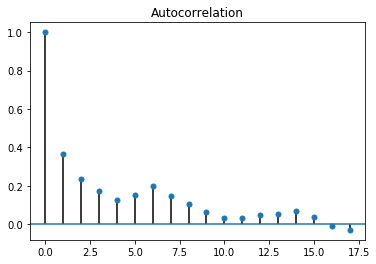

In [5]:
x = pm.acf(df['Trust'])
pm.plot_acf(x)

In [6]:
stepwise_fit = pm.auto_arima(df['Trust'], start_p=1, start_q=1,
                             max_p=3, max_q=3, m=12,
                             start_P=0, seasonal=True,
                             d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=-2763.522, BIC=-2740.759, Fit time=5.463 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=-2047.301, BIC=-2038.196, Fit time=0.148 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=-2372.063, BIC=-2353.853, Fit time=2.528 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=-2742.684, BIC=-2724.474, Fit time=3.599 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=-2768.465, BIC=-2741.149, Fit time=6.385 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=-2522.396, BIC=-2499.634, Fit time=4.401 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=-2755.313, BIC=-2723.445, Fit time=13.491 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=-2360.563, BIC=-2342.352, Fit time=1.955 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=-2748.633, BIC=-2712.213, Fit time=17.788 seconds
Fit ARIM

In [7]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  714
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                1390.232
Date:                            Tue, 12 Nov 2019   AIC                          -2768.465
Time:                                    19:56:06   BIC                          -2741.149
Sample:                                         0   HQIC                         -2757.906
                                            - 714                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -5.61e-06   8.16e-06     -0.688      0.492   -2.16e-05    1.04e-05
ar.L1          0.1951      0.036      5.384      0.000       0.124       0.266
ma.L1         -0.9151      0.017    -52.579      0.000      -0.949      -0.881
ar.S.L12      -0.0181      0.040     -0.449      0.654      -0.097       0.061
ma.S.L12      -0.9546      0.021    -44.990      0.000      -0.996      -0.913
sigma2         0.0011   4.43e-05     24.035      0.000       0.001       0.001
===================================================================================
Ljung-Box (Q):                       38.00   Jarque-Bera (JB):               104.19
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               1.21   Skew:                            -0.09
Prob(H) (two-sided):                  0.14   Kurtosis:                         4.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/Users/suvir/anaconda3/lib/python3.6/site-packages/pmdarima/utils/visualization.py:93: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  res = pd_plotting.autocorrelation_plot(series)


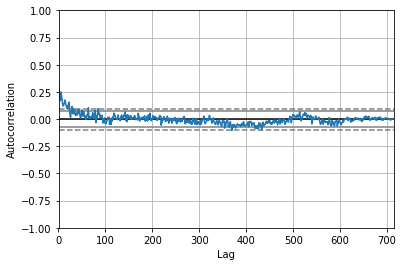

In [8]:
pm.utils.autocorr_plot(df['Trust'])

In [9]:
stepwise_fit.predict(n_periods=5)

array([0.52768781, 0.52455934, 0.52471332, 0.51884973, 0.52333613])

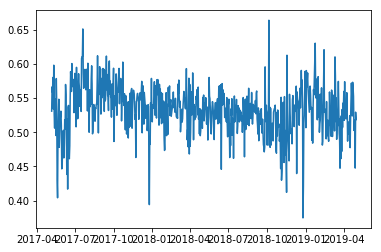

In [10]:
plt.plot('month/day', 'Trust', data=df)
plt.show()

In [11]:
import numpy as np
import pandas as pd

def zscore(df, col):
    col_mean = df[col].rolling(window=10).mean()
    col_std = df[col].rolling(window=10).std()
    return (df[col] - col_mean)/col_std

In [12]:
# trust_df = df['Trust']
# z_score_df = df.applymap(lambda x: zscore(x, 15))
# z_score_df = df.applymap(lambda x: zscore(x['Trust'], 15))
# data_zscore=trust_df.apply(lambda x: (x-x.expanding(5).mean())/x.expanding(5).std())
# col_trust_mean = df["Trust"].rolling(window=10).mean()
# col_trust_std = df["Trust"].rolling(window=10).std()
df["Anticipation Z-Score"] = zscore(df, "Anticipation")
df["Trust Z-Score"] = zscore(df, "Trust")
df["Surprise Z-Score"] = zscore(df, "Surprise")
df["Sadness Z-Score"] = zscore(df, "Sadness")
df["Joy Z-Score"] = zscore(df, "Joy")
df["Fear Z-Score"] = zscore(df, "Fear")
df["Disgust Z-Score"] = zscore(df, "Disgust")
df["Anger Z-Score"] = zscore(df, "Anger")

In [13]:
import datetime as datetime
start_date = datetime.datetime(2017, 5, 1, 0, 0)
end_date = datetime.datetime(2017, 6, 30, 0, 0)
df["month/day"] = pd.to_datetime(df["month/day"])
paris_accord_df = df[(df['month/day'] >= start_date) & (df['month/day'] <= end_date)]
paris_accord_df.head()

,month/day,Anger,Disgust,Fear,Joy,Sadness,Surprise,Trust,Anticipation,Anticipation Z-Score,Trust Z-Score,Surprise Z-Score,Sadness Z-Score,Joy Z-Score,Fear Z-Score,Disgust Z-Score,Anger Z-Score
0,2017-05-07,0.049383,0.012346,0.086420,0.117284,0.043210,0.148148,0.530864,0.012346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-05-08,0.035402,0.021609,0.073563,0.105747,0.045977,0.138391,0.566437,0.012874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-05-09,0.033810,0.029909,0.061769,0.103381,0.050715,0.148895,0.558518,0.013004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-05-10,0.031797,0.038228,0.062522,0.103966,0.049303,0.117899,0.580207,0.016077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-05-11,0.030769,0.042735,0.058689,0.123077,0.051852,0.149858,0.533903,0.009117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


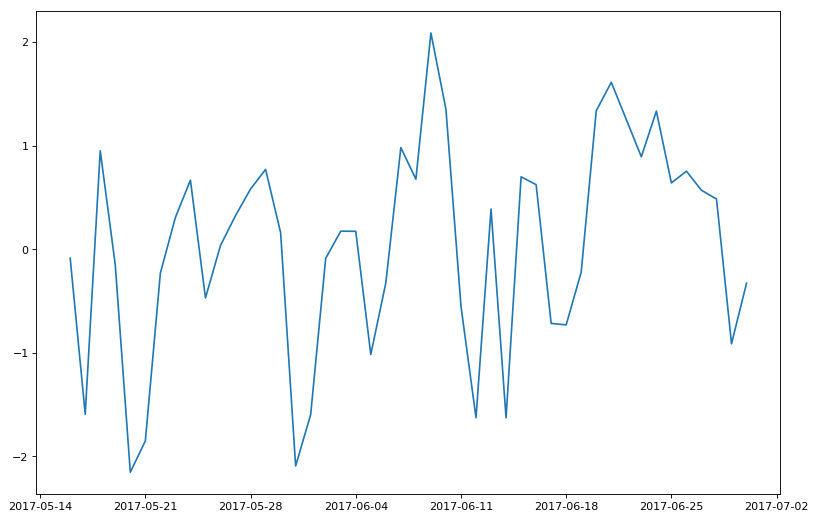

In [14]:
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.plot('month/day', 'Trust Z-Score', data=paris_accord_df)
plt.show()

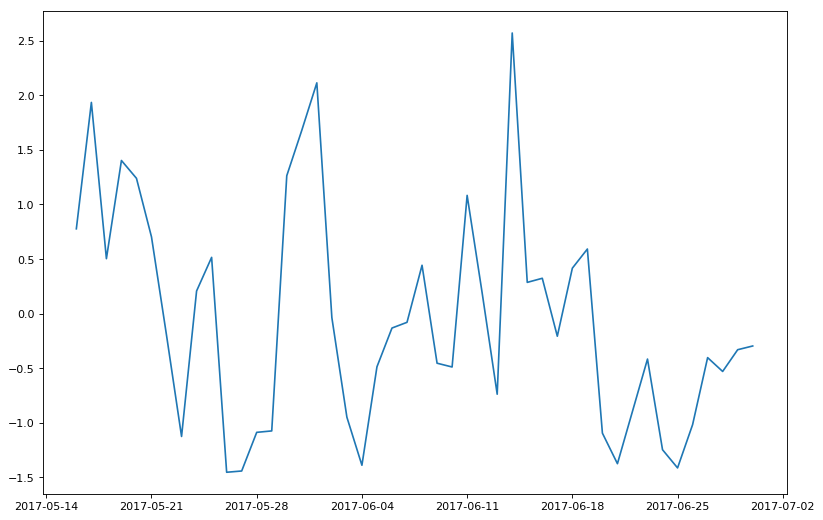

In [15]:
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.plot('month/day', 'Surprise Z-Score', data=paris_accord_df)
plt.show()

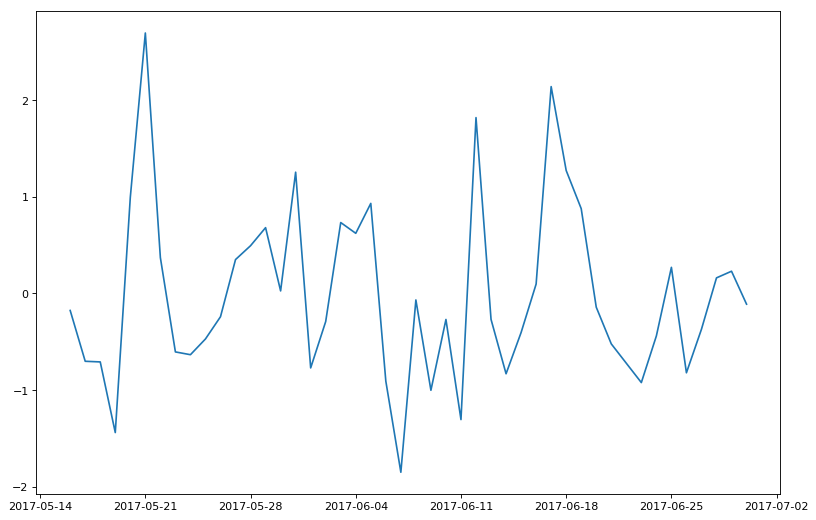

In [16]:
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.plot('month/day', 'Sadness Z-Score', data=paris_accord_df)
plt.show()

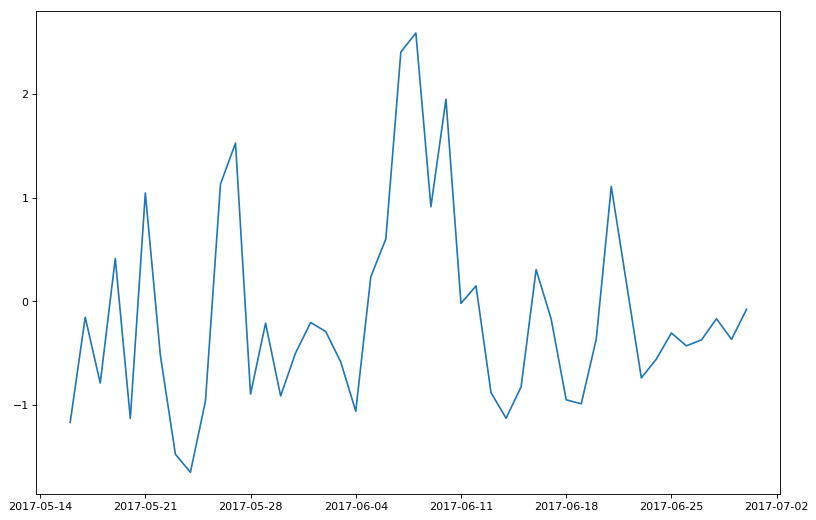

In [17]:
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.plot('month/day', 'Anticipation Z-Score', data=paris_accord_df)
plt.show()

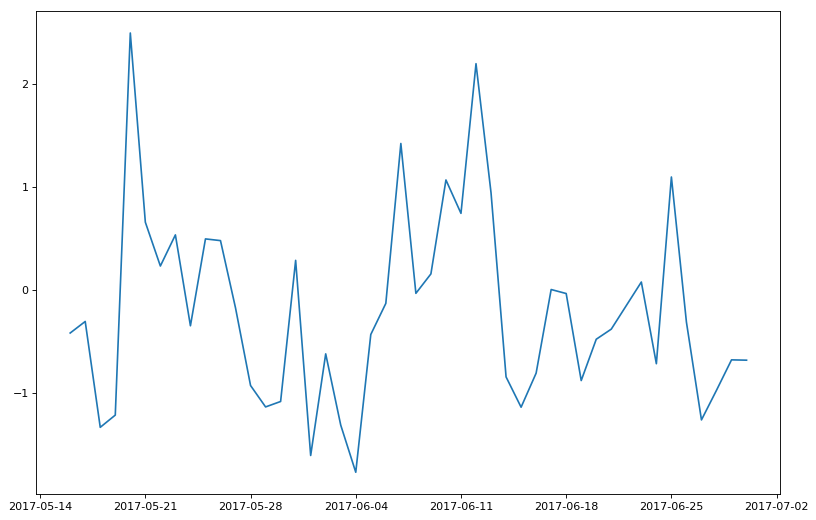

In [18]:
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.plot('month/day', 'Joy Z-Score', data=paris_accord_df)
plt.show()

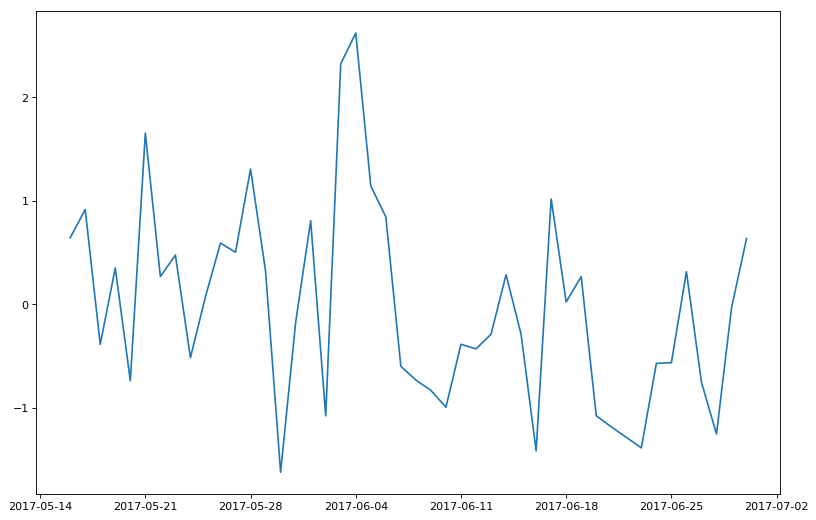

In [19]:
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.plot('month/day', 'Fear Z-Score', data=paris_accord_df)
plt.show()

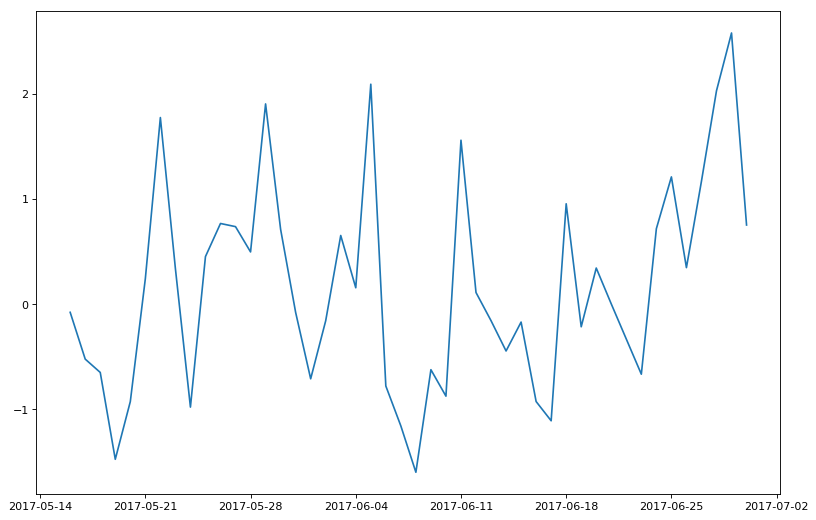

In [20]:
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.plot('month/day', 'Disgust Z-Score', data=paris_accord_df)
plt.show()

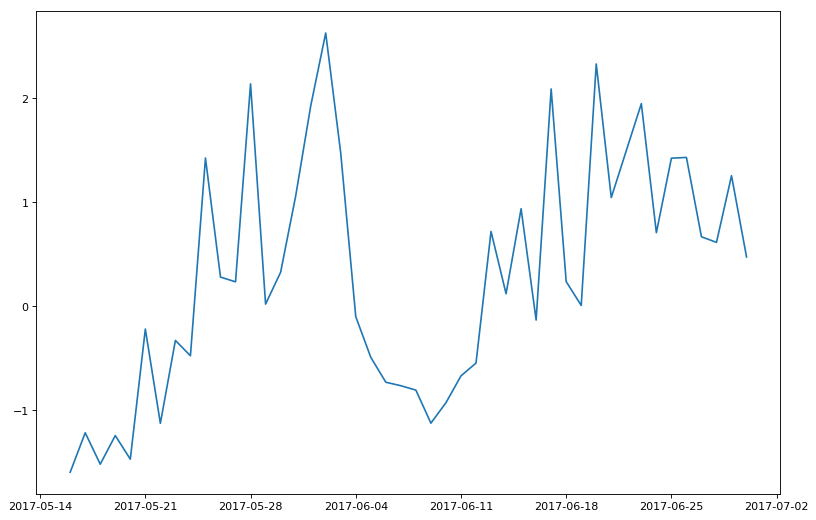

In [21]:
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.plot('month/day', 'Anger Z-Score', data=paris_accord_df)
plt.show()

In [22]:
z_scores_df = df["Trust Z-Score"]
print(len(z_scores_df))

print(len(z_scores_df.dropna()))

714
705


In [23]:
significant_df = df[(df['Trust Z-Score'] >= 2) | (df['Trust Z-Score'] <= -2)]
significant_df.head()
print(len(significant_df))

33


In [35]:
start_date = datetime.datetime(2018, 1, 15, 0, 0)
end_date = datetime.datetime(2018, 2, 15, 0, 0)
df["month/day"] = pd.to_datetime(df["month/day"])
unemployment_low_df = df[(df['month/day'] >= start_date) & (df['month/day'] <= end_date)]
unemployment_low_df.head()

,month/day,Anger,Disgust,Fear,Joy,Sadness,Surprise,Trust,Anticipation,Anticipation Z-Score,Trust Z-Score,Surprise Z-Score,Sadness Z-Score,Joy Z-Score,Fear Z-Score,Disgust Z-Score,Anger Z-Score
252,2018-01-15,0.044021,0.026412,0.071167,0.151137,0.038151,0.091709,0.572267,0.005136,-1.072175,0.746783,-1.624660,-1.126898,0.875128,0.459153,-0.271134,0.672366
253,2018-01-16,0.037237,0.022666,0.086346,0.132218,0.032380,0.127901,0.552617,0.008635,-0.004488,-0.093298,0.524032,-2.095198,-0.503956,1.664428,-1.145850,-0.600365
254,2018-01-17,0.034508,0.030194,0.069734,0.145219,0.043134,0.156722,0.510424,0.010065,0.637891,-1.649362,1.723659,0.932378,0.358687,-0.104182,0.244371,-0.922607
255,2018-01-18,0.047081,0.023540,0.072505,0.135122,0.043785,0.103107,0.570151,0.004708,-1.275418,0.639360,-0.738022,0.945719,-0.301436,0.069732,-1.063119,1.332504
256,2018-01-19,0.041127,0.025915,0.076056,0.144789,0.050141,0.101972,0.552113,0.007887,0.366677,-0.067516,-0.738832,1.834735,0.570228,0.314668,-0.447792,0.127621


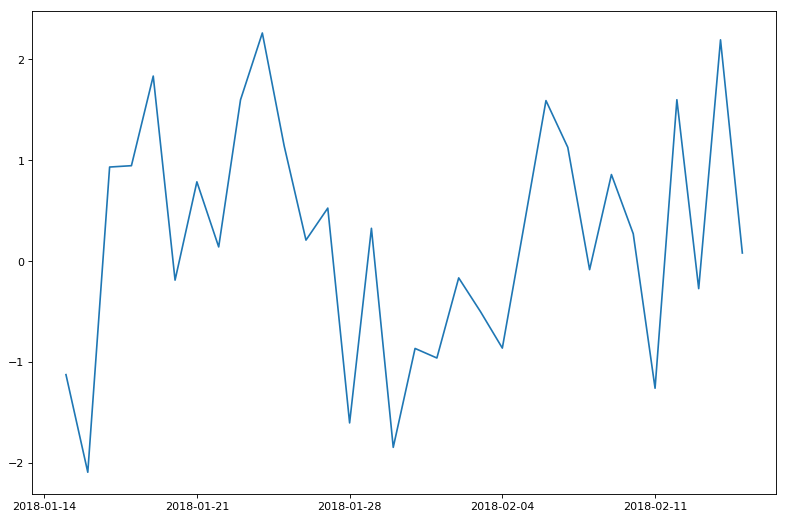

In [37]:
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.plot('month/day', 'Sadness Z-Score', data=unemployment_low_df)
plt.show()